In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sx = np.linspace(-1.2, 1.2, 24)
sy = np.linspace(-1, 1, 20)
x, y = np.meshgrid(sx,sy)

Electric potential of dipole

$V(\vec r) = \frac{k q_1}{\left| \vec r - \vec r_1 \right|} + \frac{k q_2}{\left| \vec r - \vec r_2 \right|}$

In [3]:
# Parameters
k = 9E9
q1 = 1E-9
x1, y1  = -0.3, 0
q2 = -1E-9
x2, y2  = 0.3, 0

# Potential
V = k*q1/np.sqrt((x-x1)**2+(y-y1)**2) + k*q2/np.sqrt((x-x2)**2+(y-y2)**2)

Text(0, 0.5, 'Vertical Position [m]')

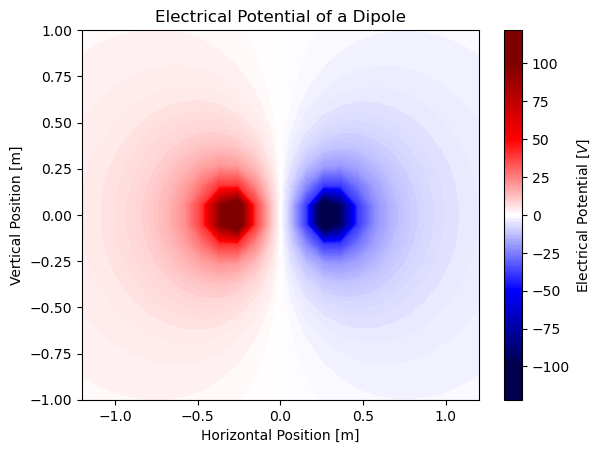

In [4]:
#plt.style.use(['nature','notebook'])
plt.contourf(x,y,V, levels=300, cmap='seismic', vmin=-100, vmax=100)
plt.colorbar(label='Electrical Potential [$V$]')
plt.title('Electrical Potential of a Dipole')
plt.xlabel('Horizontal Position [m]')
plt.ylabel('Vertical Position [m]')

Electric field of the same dipole

$ \vec E = k \frac{q_1}{\left| (\vec r - \vec r_1 \right|^{3}} (\vec r - \vec r_1) + k \frac{q_2}{\left| (\vec r - \vec r_2 \right|^{3}} (\vec r - \vec r_2) $

In [5]:
Ex = (k*q1*(x-x1)/((x-x1)**2+(y-y1)**2)**(3/2) +
      k*q2*(x-x2)/((x-x2)**2+(y-y2)**2)**(3/2))

Ey = (k*q1*(y-y1)/((x-x1)**2+(y-y1)**2)**(3/2) +
      k*q2*(y-y2)/((x-x2)**2+(y-y2)**2)**(3/2))

In [6]:
E = np.sqrt(Ex**2 + Ey**2)
cos = Ex/E
sin = Ey/E

E_max = 400
E[E>E_max] = E_max
E[E<-E_max] = -E_max

Text(0, 0.5, 'Vertical Position [m]')

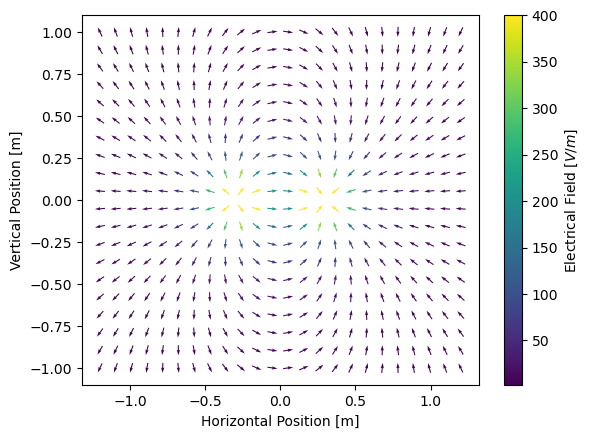

In [7]:
#plt.style.use(['nature','notebook'])
plt.quiver(x, y, cos, sin, E, pivot='mid')
plt.colorbar(label='Electrical Field [$V/m$]')
plt.xlabel('Horizontal Position [m]')
plt.ylabel('Vertical Position [m]')

In [14]:
dx = x[0,1] - x[0,0]
dy = y[1,0] - y[0,0]

Ey_, Ex_ = np.gradient(V, dy, dx)
Ex_ = -1 * Ex_
Ey_ = -1 * Ey_

E_ = np.sqrt(Ex_**2 + Ey_**2)
cos_ = Ex_/E_
sin_ = Ey_/E_

E_max_ = 400
E_[E_>E_max_] = E_max_
E_[E_<-E_max_] = -E_max_

Text(0.5, 1.0, '-dV/dx')

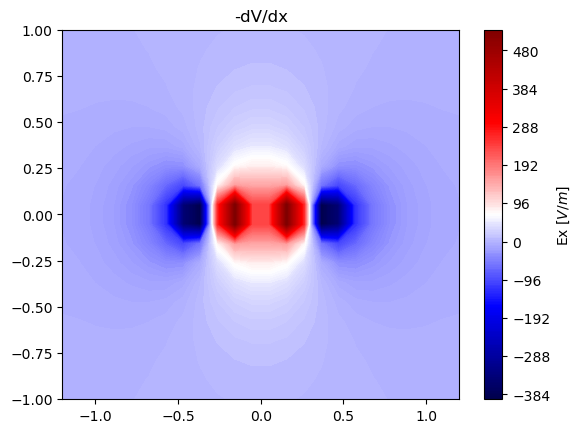

In [15]:
plt.contourf(x,y,Ex_, levels=300, cmap='seismic')
plt.colorbar(label='Ex [$V/m$]')
plt.title('-dV/dx')

Text(0.5, 1.0, '-dV/dy')

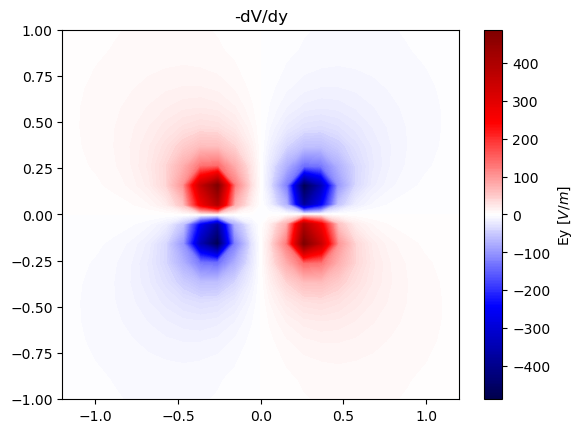

In [16]:
plt.contourf(x,y,Ey_, levels=300, cmap='seismic')
plt.colorbar(label='Ey [$V/m$]')
plt.title('-dV/dy')

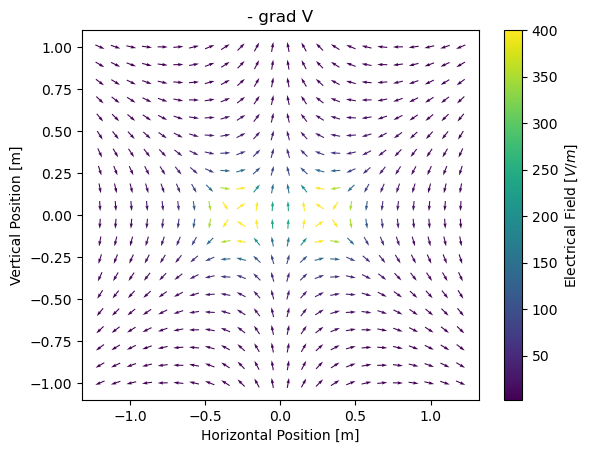

In [17]:
plt.quiver(x, y, cos_, cos_, E_, pivot='mid')
plt.colorbar(label='Electrical Field [$V/m$]')
plt.title('- grad V')
plt.xlabel('Horizontal Position [m]')
plt.ylabel('Vertical Position [m]')
plt.show()
